---
# Universidad Nacional de Rosario
---
## Facultad de Ciencias Exactas, Ingeniería y Agrimensura
---
# Tecnicatura Universitaria en Inteligencia Artificial
---
# Fundamentos de Ciencia de Datos
---
# Trabajo Practico: Análisis del cultivo de la Soja en Argentina
---
### Alumnos:

Marco Ippolito - legajo: I-0671/8

Maximiliano Romano - legajo: R-4634/5

**Dataset producción de soja**

*Link:* https://datos.magyp.gob.ar/dataset/soja-siembra-cosecha-produccion-rendimiento

*Organismo:* MINISTERIO DE AGRICULTURA GANADERIA Y PESCA: DIRECCION NACIONAL DE AGRICULTURA DE LA REPUBLICA ARGENTINA

**Dataset precio de soja en el tiempo**

*Link:* https://fred.stlouisfed.org/series/PSOYBUSDM

*Organismo:* Banco de Reserva Federal de los Estados Unidos

**Variables Dataset produccion de soja**

*cultivo_nombre*: Tipo dato: string | Nombre del cultivo.

*anio*: Tipo de dato: integer | Año a que corresponden los datos.

*campania*: Tipo dato: string | Campaña en la que se desarrollo el cultivo.

*provincia_nombre* | Tipo dato: string | Nombre de la provincia.

*provincia_id* | Tipo de dato: integer | Código de la provincia.

*departamento_nombre* | Tipo dato: string | Nombre del departamento.

*departamento_id* | Tipo de dato: integer | Código del departamento.

*superficie_sembrada_ha* | Tipo de dato: integer | Superficie sembrada en hectáreas.

*superficie_cosechada_ha* | Tipo de dato: integer | Superficie cosechada en hectáreas.

*produccion_tm* | Tipo de dato: integer | Producción en toneladas.

*rendimiento_kgxha* | Tipo de dato: integer | Rendimiento en kilos por hectárea.



**Variables Dataset precio de soja en el tiempo**

*DATE* | Tipo de dato: date | Fecha en el que cerro el precio de la soja

*PSOYBUSDM* | Tipo de dato: float | Valor en dólares del precio de la soja por tonelada

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Desactivar el warning de deprecación
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/FUNDAMENTOS CIENCIA DE DATOS/TP FUNDAMENTOS/soja-serie-1969-2019.csv',encoding='latin-1')
#datos = pd.read_csv(r'C:\Users\biank\OneDrive\Escritorio\Marco\FACULTADDD\Fundamentos Ciencia de Datos/soja-serie-1969-2019.csv',encoding='latin-1')
datos.info()
datos.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10576 entries, 0 to 10575
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           10576 non-null  object 
 1   anio                     10576 non-null  int64  
 2   campania                 10576 non-null  object 
 3   provincia_nombre         10576 non-null  object 
 4   provincia_id             10576 non-null  int64  
 5   departamento_nombre      10576 non-null  object 
 6   departamento_id          10526 non-null  float64
 7   superficie_sembrada_ha   10576 non-null  int64  
 8   superficie_cosechada_ha  10576 non-null  int64  
 9   produccion_tm            10576 non-null  int64  
 10  rendimiento_kgxha        10576 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 909.0+ KB


0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos.head(10)

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja,1969,1969/70,Buenos Aires,6,Arrecifes,6077.0,150,150,191,1273
1,soja,1969,1969/70,Buenos Aires,6,Capitán Sarmiento,6140.0,50,50,65,1300
2,soja,1969,1969/70,Buenos Aires,6,Colón,6175.0,120,120,144,1200
3,soja,1969,1969/70,Buenos Aires,6,Pergamino,6623.0,600,600,780,1300
4,soja,1969,1969/70,Buenos Aires,6,Rojas,6686.0,150,150,170,1133
5,soja,1969,1969/70,Buenos Aires,6,Salto,6714.0,200,200,250,1250
6,soja,1969,1969/70,Chaco,22,1° de Mayo,22126.0,20,20,13,650
7,soja,1969,1969/70,Chaco,22,25 de Mayo,22168.0,10,10,7,700
8,soja,1969,1969/70,Chaco,22,General Donovan,22056.0,30,30,20,667
9,soja,1969,1969/70,Chaco,22,Libertador General San Martín,22084.0,40,40,32,800


# Analisis estadístico

## Superficie sembrada

In [ ]:
datos['superficie_sembrada_ha'].describe()
# Std = Desvio standar

,superficie_sembrada_ha
count,10576.000000
mean,41628.854293
std,81489.030280
min,1.000000
25%,900.000000
50%,7600.000000
75%,45725.000000
max,894613.000000


In [ ]:
Q1_s = 900
Q3_s = 45725
IQR_s = Q3_s - Q1_s

limite_minimo_s = Q1_s - 1.5 * IQR_s
limite_maximo_s = Q3_s + 1.5 * IQR_s
print(limite_maximo_s)
outliers_s = datos[(datos['superficie_sembrada_ha'] > limite_maximo_s) | (datos['superficie_sembrada_ha'] < limite_minimo_s)]
outliers_s

112962.5


,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
932,soja,1976,1976/77,Santa Fe,82,Caseros,82014.0,143500,130000,328000,2523
1113,soja,1977,1977/78,Santa Fe,82,Caseros,82014.0,168000,154500,381000,2466
1115,soja,1977,1977/78,Santa Fe,82,Constitución,82028.0,124000,122000,288000,2361
1117,soja,1977,1977/78,Santa Fe,82,General López,82042.0,115400,110000,260000,2364
1312,soja,1978,1978/79,Santa Fe,82,Caseros,82014.0,180500,176500,451480,2558
...,...,...,...,...,...,...,...,...,...,...,...
10537,soja,2019,2019/20,Santa Fe,82,San Martín,82126.0,302934,302934,982996,3245
10540,soja,2019,2019/20,Santiago del Estero,86,Alberdi,86014.0,124150,123360,421911,3420
10543,soja,2019,2019/20,Santiago del Estero,86,Belgrano,86042.0,117500,116700,378297,3242
10548,soja,2019,2019/20,Santiago del Estero,86,General Taboada,86077.0,197510,196680,636252,3235


In [ ]:
datos['superficie_sembrada_ha'].mode()

,superficie_sembrada_ha
0,100


In [ ]:
# Rango
datos['superficie_sembrada_ha'].max() - datos['superficie_sembrada_ha'].min()

894612

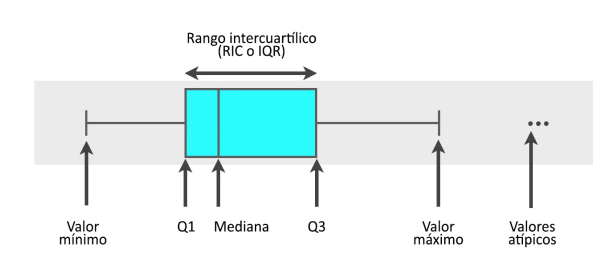

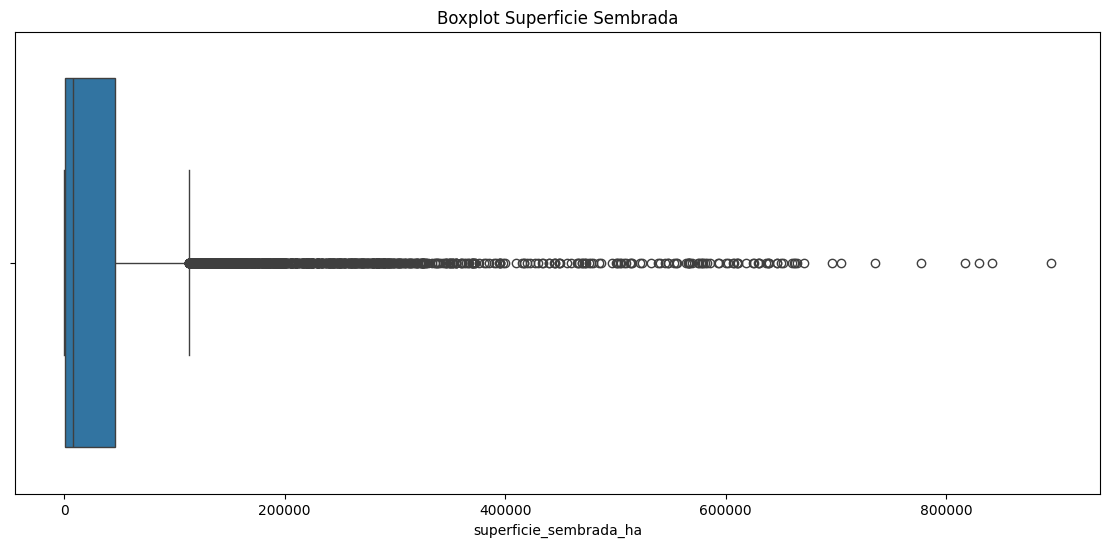

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x= 'superficie_sembrada_ha', data = datos)
plt.title('Boxplot Superficie Sembrada');

Notamos que es una distribución sesgada hacia la derecha porque el bigote derecho del boxplot es más largo que el izquierdo. Hay una mayor concentración de valores pequeños.

También se puede apreciar que hay 1161 outliers máximos. Esto se debe a que cada fila del dataset representa una plantación de soja de algún productor y, habiendo 10576 de ellas, los outliers resultan un 10% de las veces que se realizan plantaciones mayores a 112962 hectáreas.

## Superficie Cosechada

In [ ]:
datos['superficie_cosechada_ha'].describe()

,superficie_cosechada_ha
count,10576.000000
mean,40437.215772
std,79933.187295
min,0.000000
25%,800.000000
50%,7000.000000
75%,43500.000000
max,883613.000000


In [ ]:
Q1_c = 800
Q3_c = 43500
IQR_c = Q3_c - Q1_c

limite_minimo_c = Q1_c - 1.5 * IQR_c
limite_maximo_c = Q3_c + 1.5 * IQR_c
print(limite_maximo_c)
outliers_c = datos[(datos['superficie_cosechada_ha'] > limite_maximo_c) | (datos['superficie_cosechada_ha'] < limite_minimo_c)]
len(outliers_c)

107550.0


1197

In [ ]:
datos['superficie_cosechada_ha'].mode()

,superficie_cosechada_ha
0,100


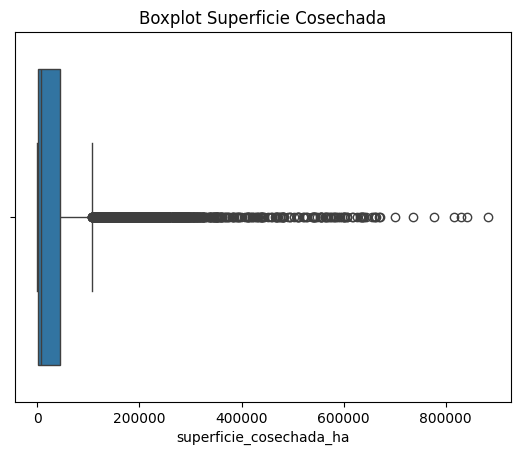

In [ ]:
sns.boxplot(x= 'superficie_cosechada_ha', data = datos);
plt.title('Boxplot Superficie Cosechada');

Podemos notar que sucede algo similar que en el boxplot de las hectareas sembradas, esto pasa por haber una pequeña diferencia entre los valores de cosecha con el sembrado. La mayoría de los valores de producción están concentrados en valores bajos, pero hay una gran cantidad de valores atípicos hacia la derecha (superficies cosechadas muy altas)

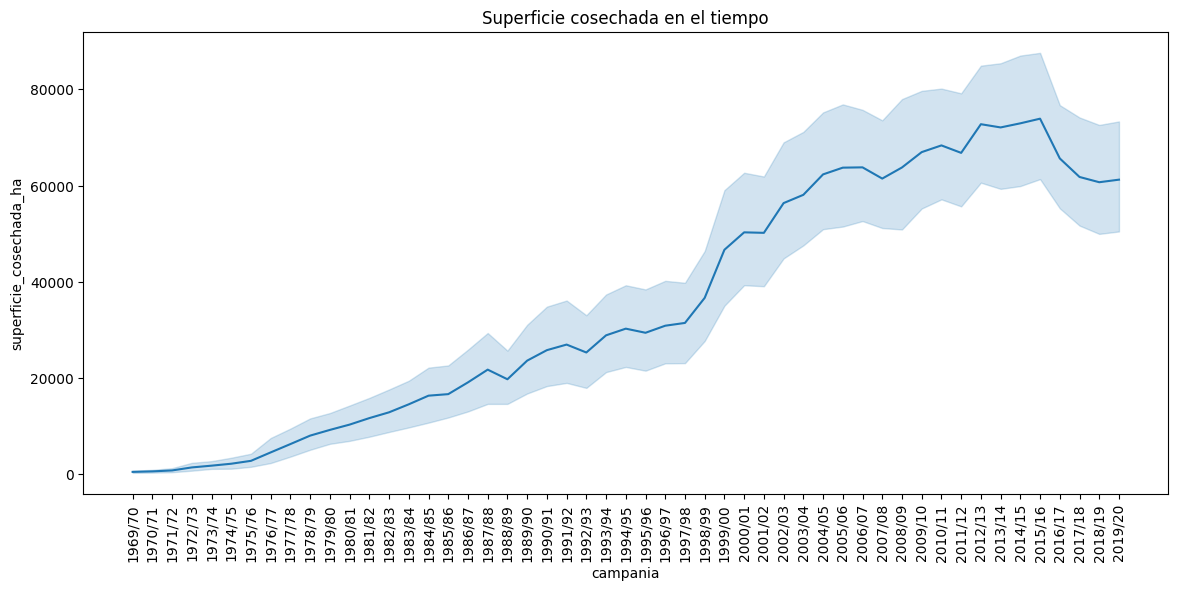

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='campania', y='superficie_cosechada_ha',data=datos)
plt.xticks(rotation= 90);
plt.title('Superficie cosechada en el tiempo');

Al igual que la variable superficie sembrada, es lógico notar un grafico creciente a lo largo del tiempo.

## Produccion Toneladas

In [ ]:
round(datos['produccion_tm'].describe(),2)

,produccion_tm
count,10576.00
mean,104746.40
std,233676.52
min,0.00
25%,1300.00
50%,13500.00
75%,97225.00
max,2637503.00


In [ ]:
datos['produccion_tm'].mode()

,produccion_tm
0,0


In [ ]:
Q1_p = 1300
Q3_p = 97225
IQR_p = Q3_p - Q1_p

limite_minimo_p = Q1_p - 1.5 * IQR_p
limite_maximo_p = Q3_p + 1.5 * IQR_p
print(limite_maximo_p)
outliers_p = datos[(datos['produccion_tm'] > limite_maximo_p) | (datos['produccion_tm'] < limite_minimo_p)]
len(outliers_p)

241112.5


1355

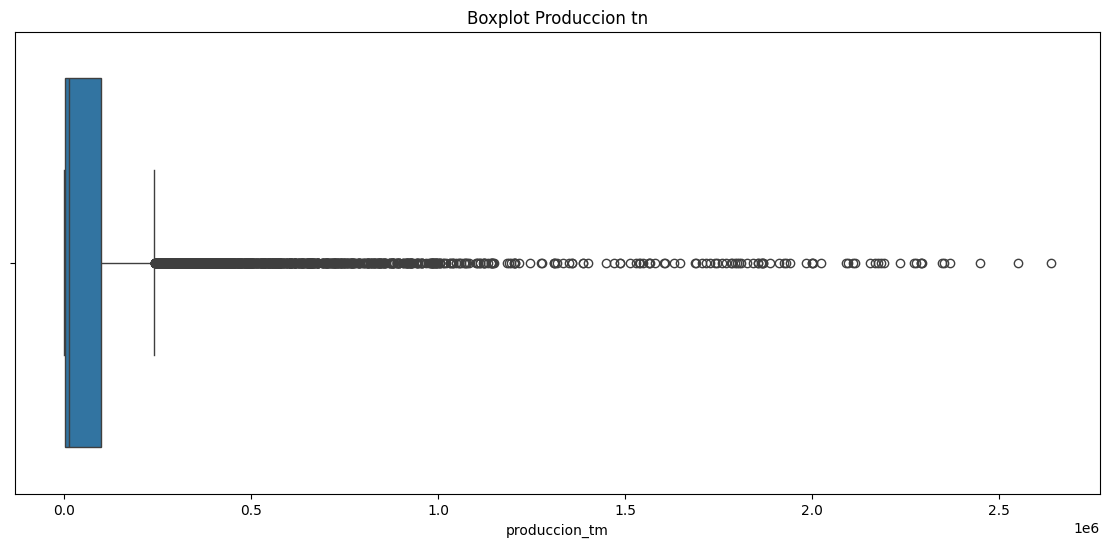

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x= 'produccion_tm', data = datos);
plt.title('Boxplot Produccion tn');

Tambien posee una distribución sesgada hacia la derecha. La mayoría de los valores de producción están concentrados en valores bajos, pero hay una gran cantidad de valores atípicos hacia la derecha (producción muy alta).

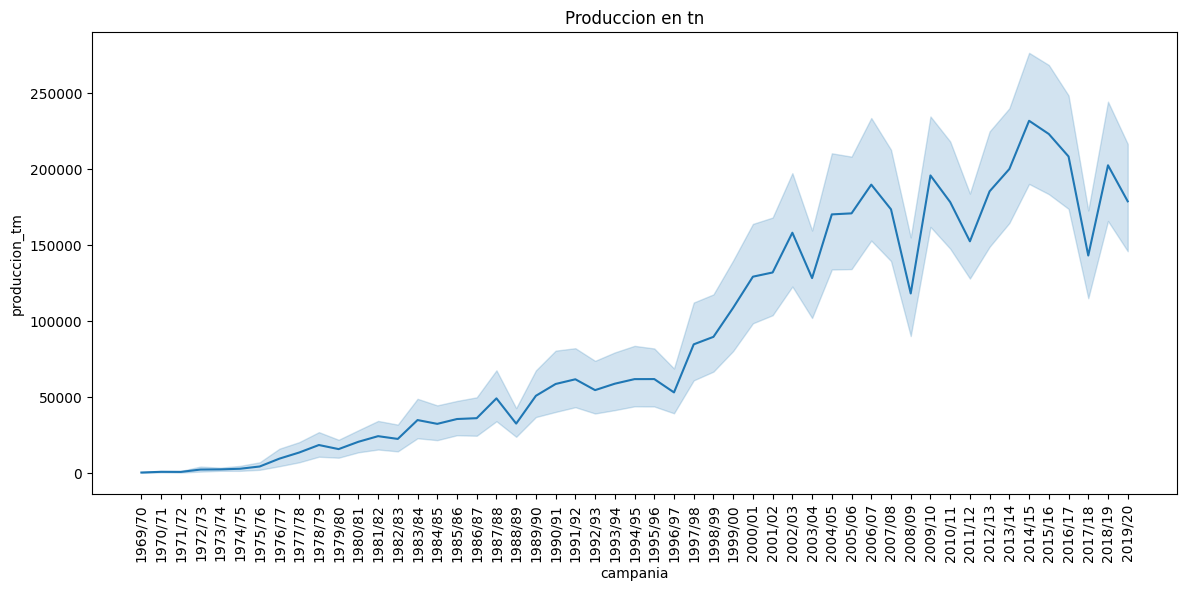

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='campania', y='produccion_tm',data=datos)
plt.xticks(rotation= 90, );
plt.title('Produccion en tn');

También vemos un comportamiente creciente en el tiempo para la variable producción

## Rendimiento kg/ha  = Produccion x 1000 / Cosecha

In [ ]:
datos['rendimiento_kgxha'].describe()

,rendimiento_kgxha
count,10576.000000
mean,2033.808245
std,799.720475
min,0.000000
25%,1500.000000
50%,2000.000000
75%,2501.250000
max,20000.000000


In [ ]:
datos['rendimiento_kgxha'].mode()

,rendimiento_kgxha
0,2000


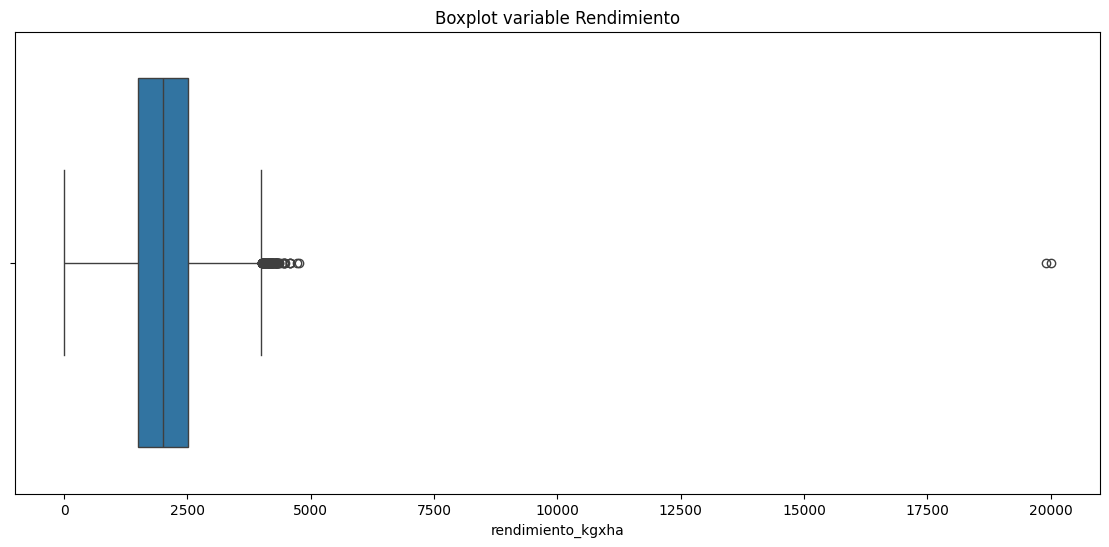

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x= 'rendimiento_kgxha', data = datos);
plt.title('Boxplot variable Rendimiento');

La mediana en el boxplot de rendimiento está en el centro de la caja (entre Q1 y Q3), lo cual indica una distribución más simétrica.Aunque existen valores atípicos en el extremo superior, la distribución dentro de la caja es más equilibrada. Osea que los valores de rendimientos estan distribuidos mas uniformemente.

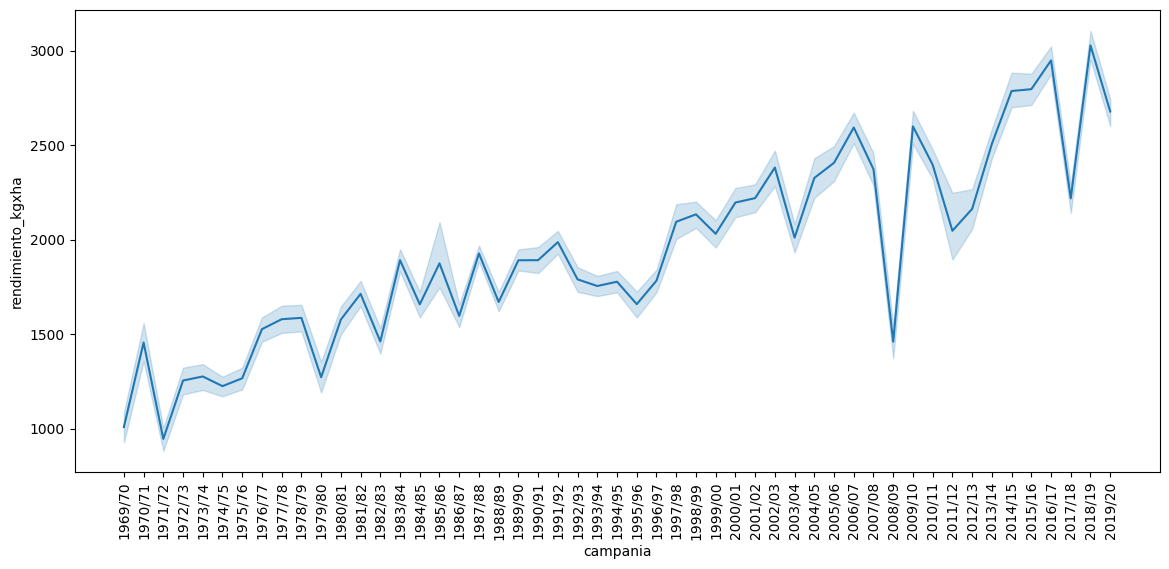

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='campania', y='rendimiento_kgxha',data=datos)
plt.xticks(rotation= 90);

En este gráfico de línea vemos de manera creciente como fue aumentando al pasar los años la cantidad de hectáreas sembradas de soja alcanzando un pico en el año 2016.

# Datos por provincia

In [ ]:
datos[(datos['superficie_cosechada_ha'] == 0)].value_counts('provincia_nombre')

,count
provincia_nombre,
Buenos Aires,56
Misiones,18
Santiago del Estero,11
Formosa,9
La Pampa,7
Córdoba,6
Chaco,4
Jujuy,3
Salta,3


In [ ]:
totales_por_provincia = datos.groupby('provincia_nombre')['superficie_sembrada_ha'].sum().reset_index()
totales_por_provincia['superficie_cosechada_ha'] = datos.groupby('provincia_nombre')['superficie_cosechada_ha'].sum().reset_index().superficie_cosechada_ha
totales_por_provincia['Pérdida'] = totales_por_provincia.superficie_sembrada_ha - totales_por_provincia.superficie_cosechada_ha
totales_por_provincia['produccion_tm'] = datos.groupby('provincia_nombre')['produccion_tm'].sum().reset_index().produccion_tm
totales_por_provincia['rendimiento_kgxha'] = datos.groupby('provincia_nombre')['rendimiento_kgxha'].mean().reset_index().rendimiento_kgxha
totales_por_provincia

,provincia_nombre,superficie_sembrada_ha,superficie_cosechada_ha,Pérdida,produccion_tm,rendimiento_kgxha
0,Buenos Aires,121061011,118006650,3054361,311512085,2153.034656
1,Catamarca,964476,946536,17940,2346984,2033.123711
2,Chaco,13833233,12783327,1049906,25378237,1649.891447
3,Corrientes,820074,754425,65649,1196068,1537.517766
4,Córdoba,120607874,117951300,2656574,309864256,2245.886653
5,Entre Ríos,27707502,26882855,824647,62947858,1951.369436
6,Formosa,329200,287281,41919,599670,1660.684848
7,Jujuy,183016,173452,9564,403970,2114.100000
8,La Pampa,7079439,6751965,327474,16369157,1710.184685
9,Mendoza,35,0,35,0,0.000000


## Top provincias siembra

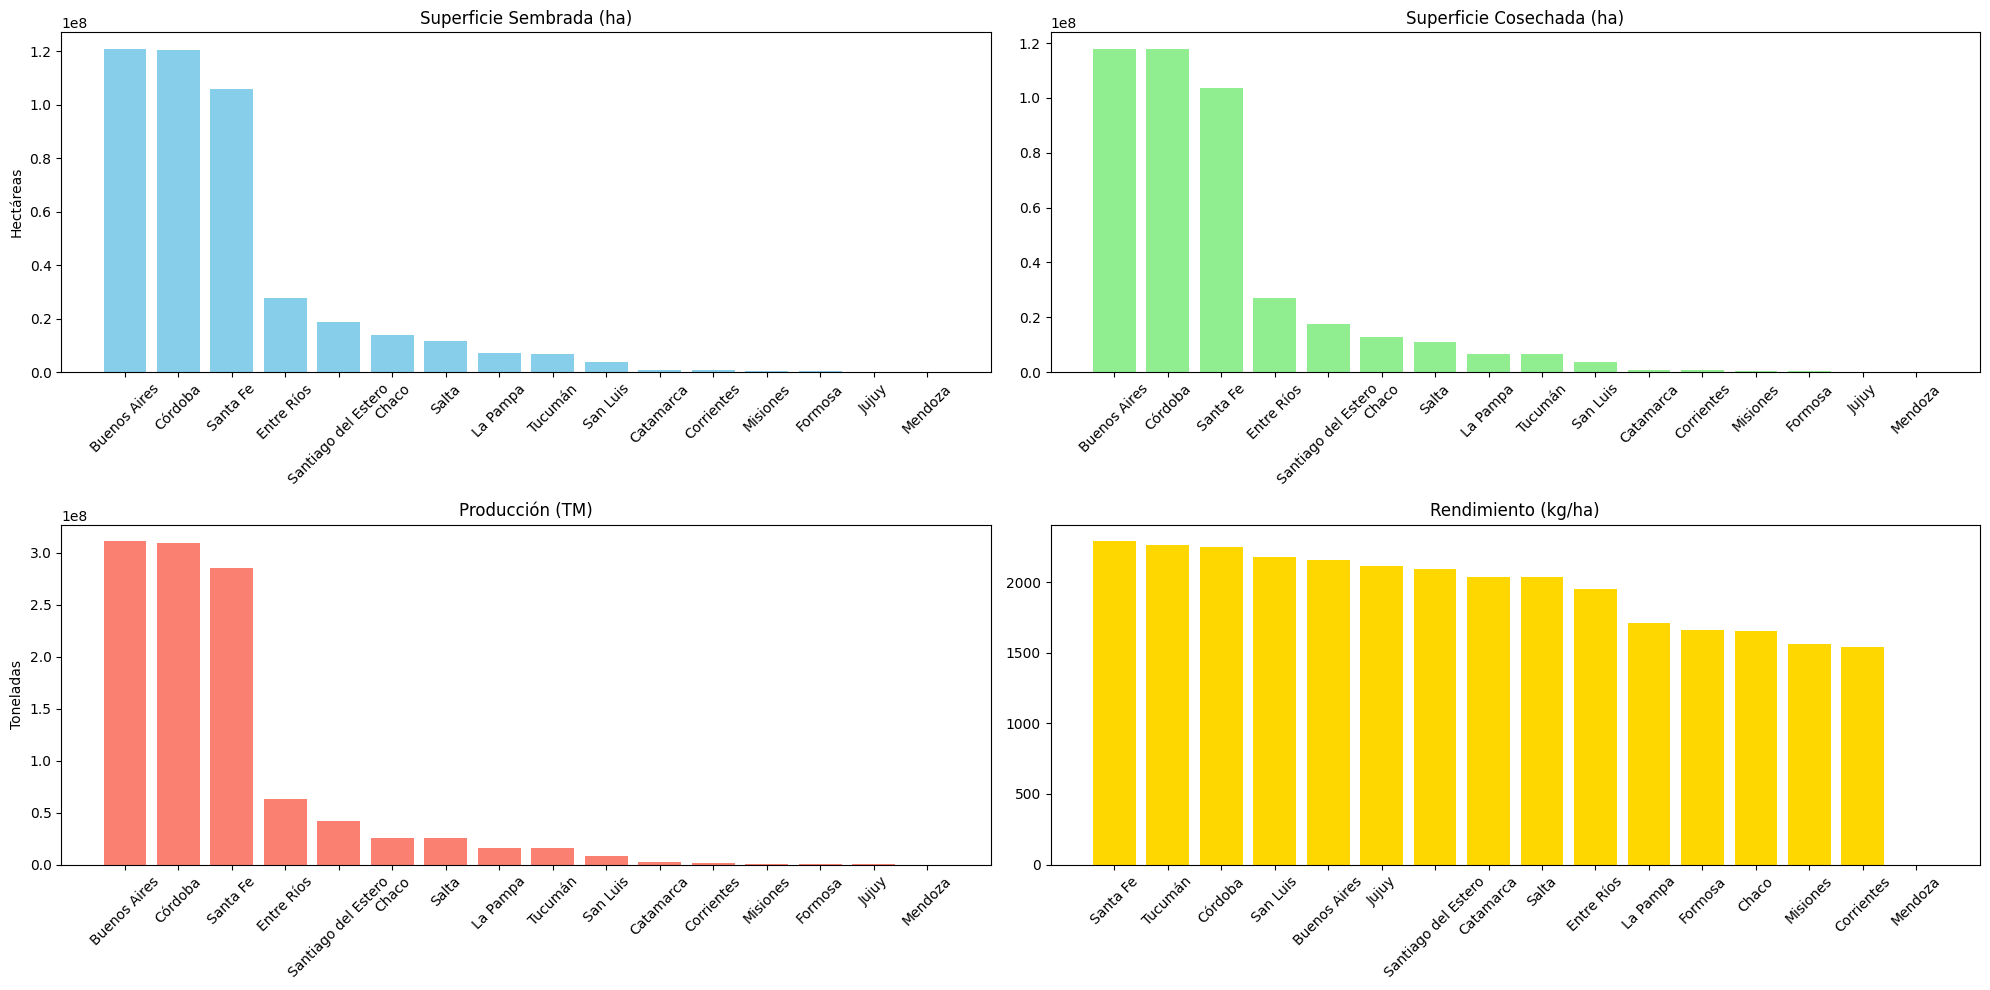

In [ ]:
# Crear la figura y los subplots en una cuadrícula de 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Ordenar y graficar para 'superficie_sembrada_ha'
superficie_sembrada_sorted = totales_por_provincia.sort_values(by='superficie_sembrada_ha', ascending=False)
axes[0, 0].bar(superficie_sembrada_sorted['provincia_nombre'], superficie_sembrada_sorted['superficie_sembrada_ha'], color='skyblue')
axes[0, 0].set_title('Superficie Sembrada (ha)')
axes[0, 0].set_ylabel('Hectáreas')
axes[0, 0].tick_params(axis='x', rotation=45)

# Ordenar y graficar para 'superficie_cosechada_ha'
superficie_cosechada_sorted = totales_por_provincia.sort_values(by='superficie_cosechada_ha', ascending=False)
axes[0, 1].bar(superficie_cosechada_sorted['provincia_nombre'], superficie_cosechada_sorted['superficie_cosechada_ha'], color='lightgreen')
axes[0, 1].set_title('Superficie Cosechada (ha)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Ordenar y graficar para 'produccion_tm'
produccion_sorted = totales_por_provincia.sort_values(by='produccion_tm', ascending=False)
axes[1, 0].bar(produccion_sorted['provincia_nombre'], produccion_sorted['produccion_tm'], color='salmon')
axes[1, 0].set_title('Producción (TM)')
axes[1, 0].set_ylabel('Toneladas')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ordenar y graficar para 'rendimiento_kgxha'
rendimiento_sorted = totales_por_provincia.sort_values(by='rendimiento_kgxha', ascending=False)
axes[1, 1].bar(rendimiento_sorted['provincia_nombre'], rendimiento_sorted['rendimiento_kgxha'], color='gold')
axes[1, 1].set_title('Rendimiento (kg/ha)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustar el diseño para que no se superpongan
plt.tight_layout()
plt.show()


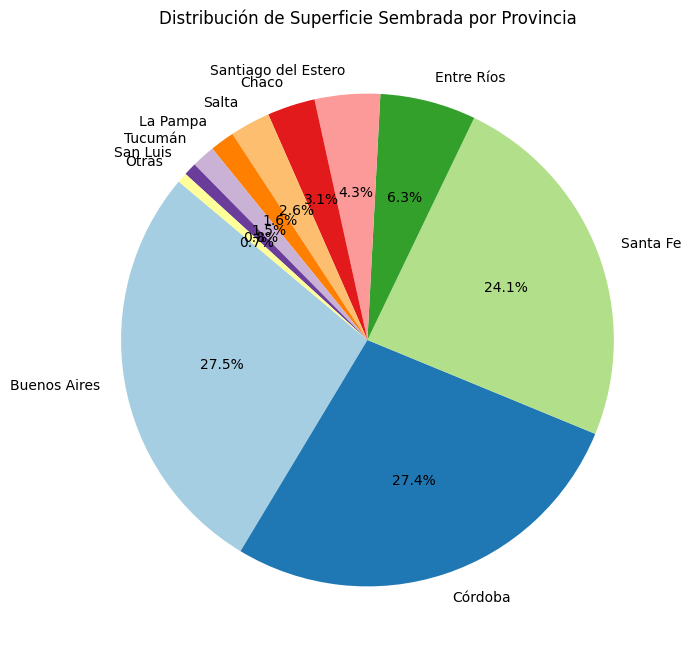

In [ ]:
totales_por_provincia_sorted = totales_por_provincia.sort_values('superficie_sembrada_ha', ascending=False)
resultados_finales = totales_por_provincia_sorted[['provincia_nombre', 'superficie_sembrada_ha']]

provincias = resultados_finales['provincia_nombre']
superficies = resultados_finales['superficie_sembrada_ha']

# Opcional: Agrupar provincias con superficies más pequeñas en "Otras" para simplificar el gráfico
top_n = 10
provincias_top = provincias[:top_n].tolist()
superficies_top = superficies[:top_n].tolist()
if len(provincias) > top_n:
    provincias_top.append("Otras")
    superficies_top.append(superficies[top_n:].sum())

# Crear gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(superficies_top, labels=provincias_top, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Título y visualización
plt.title("Distribución de Superficie Sembrada por Provincia")
plt.show()

En este gráfico de torta con respecto a la variable Superficie Sembrada por provincia, notamos que la mayor concentración de siembra se da en tres provincias las cuales representan mas del 75%, las cuales son Buenos Aires, Cordoba y Santa Fe.

<ipython-input-33-39bf0b90b931>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rendimiento', y='provincia_nombre', data=top_rendimiento_provincia, palette='viridis')


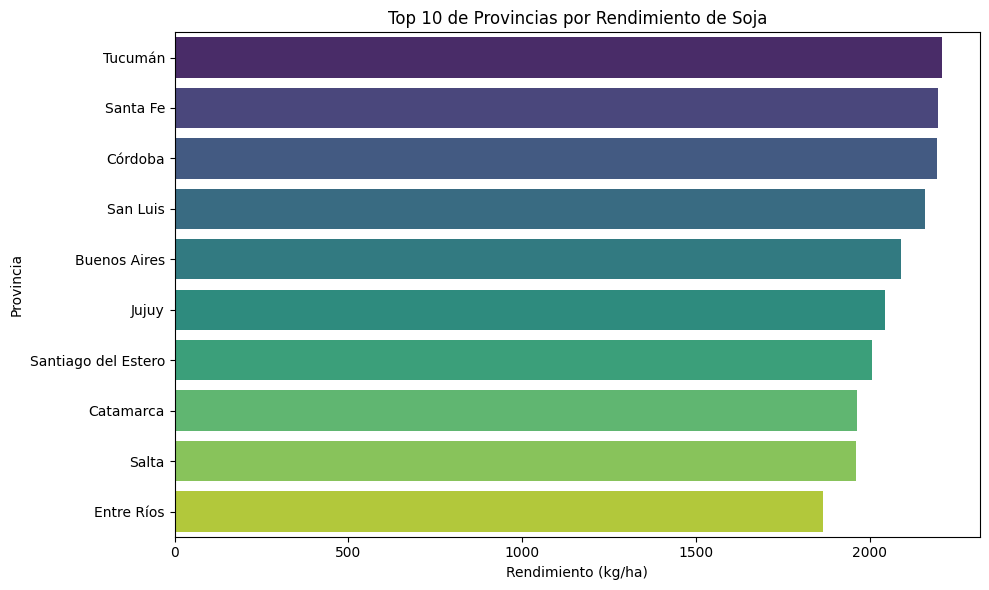

In [ ]:
# Calcular el rendimiento por provincia (kg/ha)
datos['rendimiento'] = datos['produccion_tm'] / datos['superficie_sembrada_ha'] * 1000  # Rendimiento en kg/ha

# Agrupar por provincia y calcular el rendimiento promedio
rendimiento_provincia = datos.groupby('provincia_nombre')['rendimiento'].mean().reset_index()

# Ordenar por rendimiento de mayor a menor
top_rendimiento_provincia = rendimiento_provincia.sort_values(by='rendimiento', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rendimiento', y='provincia_nombre', data=top_rendimiento_provincia, palette='viridis')
plt.title('Top 10 de Provincias por Rendimiento de Soja')
plt.xlabel('Rendimiento (kg/ha)')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()

Sin embargo podemos notar que hay una sorpresa en cuanto al rendimiento de las provincias, en donde aparece Tucumán como la provincia con mas rendimiento en cuanto a los kilos de soja obtenidos con respecto a la cantidad de hectareas cosechadas.

<ipython-input-34-5793198ae2d0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia_nombre', y='proporcion_cosechada', data=proporciones, palette="coolwarm")


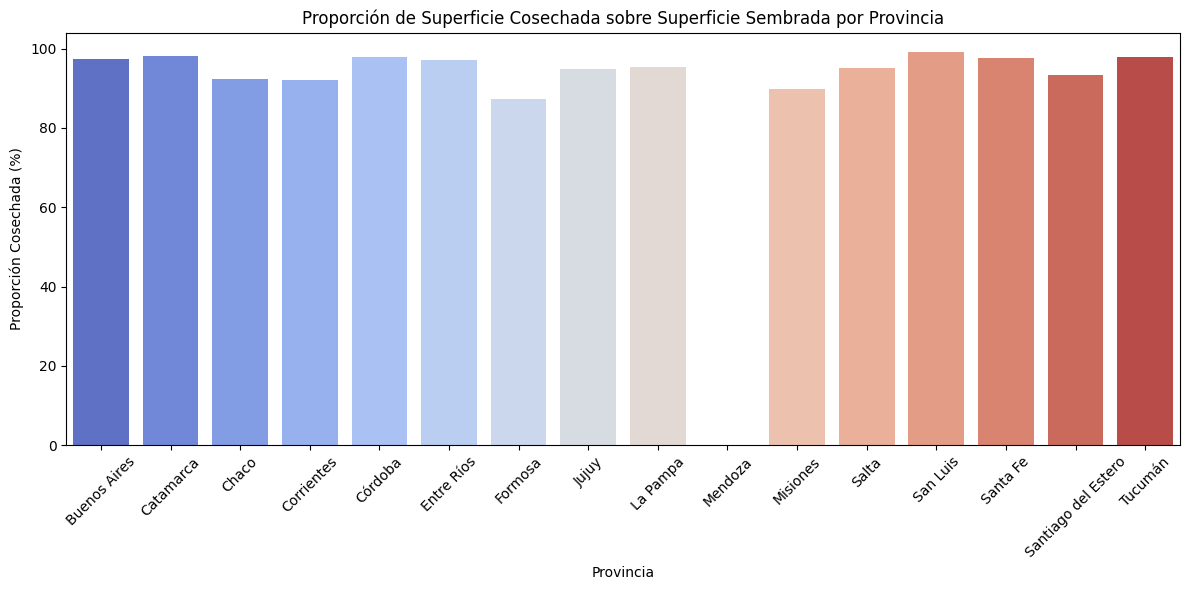

In [ ]:
# Agrupar por Provincia y sumar las superficies sembrada y cosechada
proporciones = datos.groupby('provincia_nombre')[['superficie_sembrada_ha', 'superficie_cosechada_ha']].sum().reset_index()

# Crear una nueva columna para la proporción de superficie cosechada respecto a la sembrada
proporciones['proporcion_cosechada'] = proporciones['superficie_cosechada_ha'] / proporciones['superficie_sembrada_ha'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia_nombre', y='proporcion_cosechada', data=proporciones, palette="coolwarm")

plt.title('Proporción de Superficie Cosechada sobre Superficie Sembrada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Proporción Cosechada (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar en este gráfico de barras para la variable cuantitativa discreta "Porcion Cosechada" que en todas las provincias excepto en Mendoza se cosecho mas de un 80% de lo que se sembró que da como provincia ganadora a San Luis.

## Top provincias cosecha

In [ ]:
totales_por_provincia_sorted = totales_por_provincia.sort_values('superficie_cosechada_ha', ascending=False)
resultados_finales = totales_por_provincia_sorted[['provincia_nombre', 'superficie_cosechada_ha']]
print(resultados_finales)

       provincia_nombre  superficie_cosechada_ha
0          Buenos Aires                118006650
4               Córdoba                117951300
13             Santa Fe                103524678
5            Entre Ríos                 26882855
14  Santiago del Estero                 17650929
2                 Chaco                 12783327
11                Salta                 11073347
8              La Pampa                  6751965
15              Tucumán                  6645934
12             San Luis                  3683062
1             Catamarca                   946536
3            Corrientes                   754425
10             Misiones                   548253
6               Formosa                   287281
7                 Jujuy                   173452
9               Mendoza                        0


# Precios soja

In [ ]:
df_sojita = pd.read_csv('/content/drive/MyDrive/FUNDAMENTOS CIENCIA DE DATOS/TP FUNDAMENTOS/PSOYBUSDM.csv')
#df_sojita = pd.read_csv(r'C:\Users\biank\OneDrive\Escritorio\Marco\FACULTADDD\Fundamentos Ciencia de Datos/PSOYBUSDM.csv')
df_sojita

,DATE,PSOYBUSDM
0,1990-01-01,209.827483
1,1990-02-01,208.449456
2,1990-03-01,218.279378
3,1990-04-01,220.667957
4,1990-05-01,228.316003
...,...,...
412,2024-05-01,447.494333
413,2024-06-01,430.971450
414,2024-07-01,411.082125
415,2024-08-01,361.829410


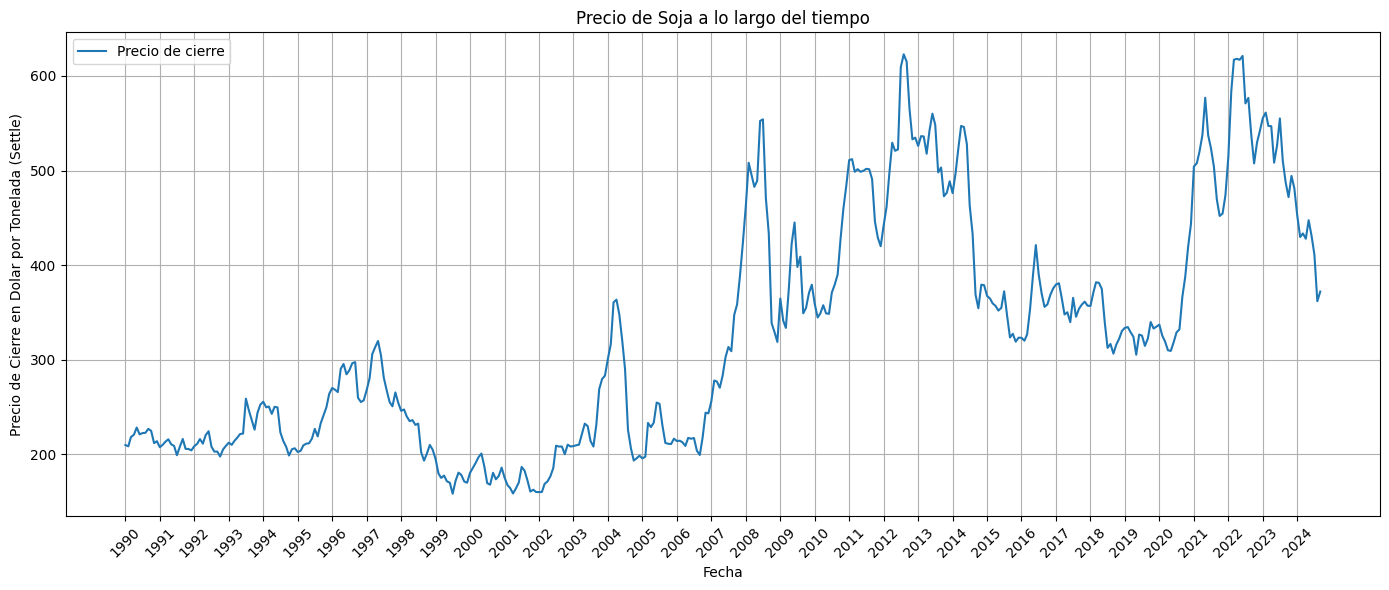

In [ ]:
df_sojita["DATE"] = pd.to_datetime(df_sojita["DATE"])
df = df_sojita.sort_values("DATE")

# Generación del gráfico
plt.figure(figsize=(14, 6))
plt.plot(df["DATE"], df["PSOYBUSDM"], linestyle="-", label="Precio de cierre")
plt.title("Precio de Soja a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre en Dolar por Tonelada (Settle)")
plt.legend()

# Configurar eje X para mostrar todos los años
years = pd.date_range(start=df_sojita['DATE'].min(), end=df_sojita['DATE'].max(), freq='YS')
plt.xticks(years, years.year, rotation=45)

plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar una variabilidad creciente en general con el precio de la soja a lo largo del tiempo.

En las primeras décadas (desde 1990 hasta aproximadamente 2003), el precio tiene menos fluctuaciones y se mantiene en un rango más estrecho, alrededor de los 200-300 dólares por tonelada. Sin embargo, a partir de 2004, el precio comienza a mostrar fluctuaciones más amplias y frecuentes, alcanzando valores mucho más altos y experimentando aumentos y caídas pronunciadas. Teniendo a los años 2007 y 2008 con un aumento destacado (esto coincide con la crisis alimentaria mundial de 2007-2008) lo que seguramente se debe a la oferta y demanda. Después de 2008, el precio cae rápidamente y se recupera en 2012-2013.
En 2020-2021, el precio vuelve a alcanzar un máximo importante, posiblemente impulsado por la pandemia de COVID-19 y sus efectos en la economía global. Para luego producirse una baja importante hasta el dia de hoy.

# Correlacion

* Entre 0.7 y 1.0 : Correlación alta. Indica una relación fuerte entre las dos variables, donde cambios en una suelen estar asociados a cambios en la otra.
* Entre 0.4 y 0.69 : Correlación moderada. Existe una relación, pero no tan fuerte.
* Entre 0 y 0.39 : Correlación baja. La relación entre las variables es débil o inexistente.

In [ ]:
# Convertir la columna 'DATE' a tipo datetime y extraer el año en 'df_sojita'
df_sojita['DATE'] = pd.to_datetime(df_sojita['DATE'])
df_sojita['anio'] = df_sojita['DATE'].dt.year

# Agrupar los datos de 'datos' por 'anio' y aplicar las agregaciones
datos_agg = datos.groupby('anio').agg({
    'superficie_sembrada_ha': 'sum',
    'superficie_cosechada_ha': 'sum',
    'produccion_tm': 'sum',
    'rendimiento_kgxha': 'mean'
}).reset_index()

# Promediar el precio de soja anual en 'df_sojita'
precio_soja_anual = df_sojita.groupby('anio').agg({'PSOYBUSDM': 'mean'}).reset_index()

# Unir los datos agregados anuales con los datos de precio promedio de soja
data_combined = pd.merge(datos_agg, precio_soja_anual, on='anio', how='inner')


In [ ]:
# Matriz de Covarianza
data_combined.cov()

,anio,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,PSOYBUSDM
anio,7.750000e+01,4.503970e+07,4.340363e+07,1.373736e+08,2.554707e+03,6.613456e+02
superficie_sembrada_ha,4.503970e+07,3.023840e+13,2.919114e+13,8.862120e+13,1.428517e+09,4.406347e+08
superficie_cosechada_ha,4.340363e+07,2.919114e+13,2.824760e+13,8.639018e+13,1.417189e+09,4.182485e+08
produccion_tm,1.373736e+08,8.862120e+13,8.639018e+13,2.885806e+14,5.687305e+09,1.167270e+09
rendimiento_kgxha,2.554707e+03,1.428517e+09,1.417189e+09,5.687305e+09,1.554812e+05,1.182644e+04
PSOYBUSDM,6.613456e+02,4.406347e+08,4.182485e+08,1.167270e+09,1.182644e+04,1.150974e+04


La matriz de covarianza muestra cómo varían las variables en relación unas con otras. Las variables con mayor covarianza son:
 * Superficie Sembrada y Superficie Cosechada: Covarianza alta, lo que indica que, generalmente, cuanto mayor es la superficie sembrada, mayor es la superficie cosechada.
 * Producción Total y Superficie Sembrada/Cosechada: Relación fuerte, ya que ambas están directamente relacionadas con el volumen de producción.

In [ ]:
# Mariz de correlacion
data_combined.corr(method = 'pearson')

,anio,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,PSOYBUSDM
anio,1.000000,0.930390,0.927651,0.918584,0.735955,0.700237
superficie_sembrada_ha,0.930390,1.000000,0.998805,0.948691,0.658821,0.746907
superficie_cosechada_ha,0.927651,0.998805,1.000000,0.956841,0.676236,0.733518
produccion_tm,0.918584,0.948691,0.956841,1.000000,0.849051,0.640479
rendimiento_kgxha,0.735955,0.658821,0.676236,0.849051,1.000000,0.279565
PSOYBUSDM,0.700237,0.746907,0.733518,0.640479,0.279565,1.000000


La matriz de correlación de Pearson se utilizó para medir la relación lineal entre las variables. Los valores obtenidos indican la fuerza y dirección de la correlación.
* Podemos ver una relacion alta en:
  * Superficie Sembrada - Superficie Cosechada (0.99): Correlación extremadamente fuerte, lo cual es lógico ya que ambas están relacionadas directamente con la cantidad de terreno cultivado.
  * Superficie Cosechada - Producción Tm (0.95): Correlación fuerte, lo que sugiere que el aumento en superficie cosechada incrementa significativamente la producción.
  * Producción Tm - Superficie Sembrada (0.941): Fuerte relación positiva, indicando que mayor superficie sembrada también suele reflejarse en mayor producción.
  * PSOYBUSDM (Precio soja) - Superficie Sembrada (0.74): Relación alta entre el precio de la soja y la superficie sembrada.
* Correlacion media:
  * Rendimiento - Superficie Sembrada/Cosechada (0.65): Existe una relación moderada entre el rendimiento y la superficie sembrada/cosechada, indicando que el rendimiento promedio también depende de estas variables, aunque con menos intensidad.
* Correlacion baja:
  * PSOYBUSDM - Rendimiento (0.27): Relación baja, lo cual indica que el precio de la soja tiene poca relación directa con el rendimiento promedio por hectárea.

In [ ]:
data_combined.corr(method = 'spearman')

,anio,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,PSOYBUSDM
anio,1.000000,0.911012,0.913237,0.911457,0.761958,0.702336
superficie_sembrada_ha,0.911012,1.000000,0.994661,0.919466,0.671190,0.782425
superficie_cosechada_ha,0.913237,0.994661,1.000000,0.936374,0.704561,0.771746
produccion_tm,0.911457,0.919466,0.936374,1.000000,0.869633,0.634260
rendimiento_kgxha,0.761958,0.671190,0.704561,0.869633,1.000000,0.306785
PSOYBUSDM,0.702336,0.782425,0.771746,0.634260,0.306785,1.000000


* Superficie Sembrada - Superficie Cosechada (0.99): Similar a Pearson, muestra una correlación extremadamente alta debido a la relación directa en la cantidad de tierra cultivada.
* Producción Total - Superficie Cosechada (0.93): Mantiene una correlación fuerte, confirmando la relación entre producción y superficie.
* PSOYBUSDM (Precio soja) - Superficie Sembrada (0.78): Spearman muestra una relación más alta que Pearson, lo cual puede sugerir que el precio de la soja sigue una tendencia que se asocia más con el área sembrada.

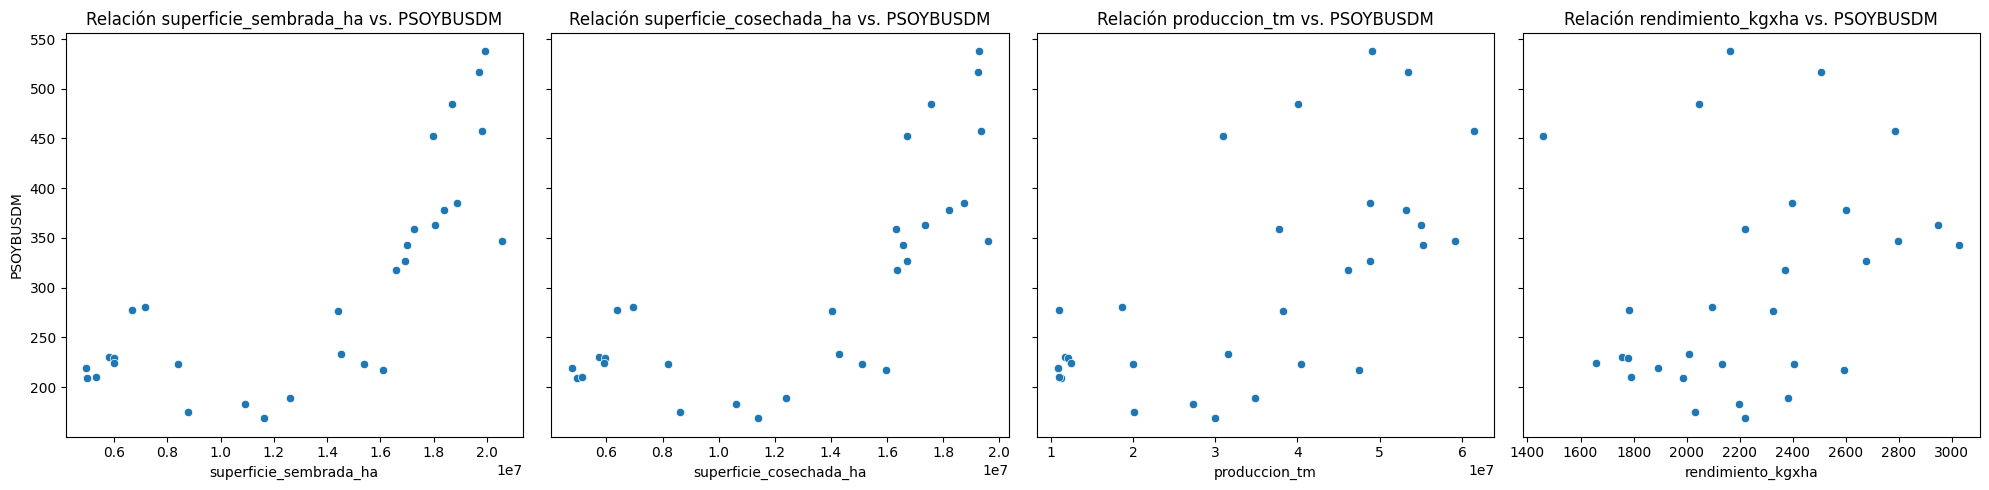

In [ ]:
# Seleccionar las columnas cuantitativas de 'data_combined', excluyendo 'PSOYBUSDM'
columns_to_plot = ['superficie_sembrada_ha', 'superficie_cosechada_ha', 'produccion_tm', 'rendimiento_kgxha']

# Configurar la figura con una cantidad adecuada de filas y columnas
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5), sharey=True)

# Iterar sobre cada columna para crear un scatterplot de esa columna vs. 'PSOYBUSDM'
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=col, y='PSOYBUSDM', data=data_combined, ax=axes[i])
    axes[i].set_title(f'Relación {col} vs. PSOYBUSDM')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('PSOYBUSDM' if i == 0 else "")  # Solo el primer gráfico tiene etiqueta Y para claridad

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


*Relación Sup Sembrada vs PSOYBUSDM(Precio soja en USD por tonelada)*

En el primer gráfico, se observa una tendencia positiva entre la superficie sembrada y el precio de la soja. A medida que la superficie sembrada aumenta, el precio de la soja también parece elevarse en generalmente. Esto podría sugerir que en los años de alta demanda, la siembra es mayor.

*Relación Sup Cosechada vs PSOYBUSDM(Precio soja en USD por tonelada)*

En el segundo gráfico, vemos una relación similar a la anterior, con una tendencia positiva entre la superficie cosechada y el precio de la soja. Esto indica que cuando se cosecha más, el precio también tiende a ser más alto. Sin embargo, la relación acá parece ser menos fuerte que en el primer gráfico, ya que los puntos están un poco más dispersos. Esto podría deberse a factores externos.

*Relación Producción vs PSOYBUSDM(Precio soja en USD por tonelada)*

En el tercer gráfico, la relación entre la producción total de soja y su precio parece menos definida. Aunque algunos puntos altos de producción coinciden con precios altos, hay bastante dispersión, lo que sugiere que la producción en toneladas no tiene una relación tan directa con el precio de la soja.

*Relación Rendimiento vs PSOYBUSDM(Precio soja en USD por tonelada)*

En el último gráfico, la relación entre el rendimiento por hectárea y el precio de la soja también parece bastante dispersa, sin una tendencia clara. Esto indica que el rendimiento no está necesariamente relacionado con el precio en dólares. Un rendimiento mayor no implica directamente un precio mayor de la soja, lo cual puede deberse a que el rendimiento depende más de factores agrícolas(como clima y técnicas de cultivo), mientras que el precio depende de factores económicos externos.

La correlación de Pearson es muy sensible a los valores atípicos, porque utiliza los valores exactos de las variables. Un valor atípico puede influir fuertemente en el resultado y distorsionar la correlación.
Spearman, al basarse en los rangos, es menos afectado por valores atípicos. Esto hace que Spearman sea más adecuado cuando existen datos extremos o anomalías en el conjunto de datos, como un año con una producción o precio anormalmente alto o bajo.
Por eso se elige Spearman.

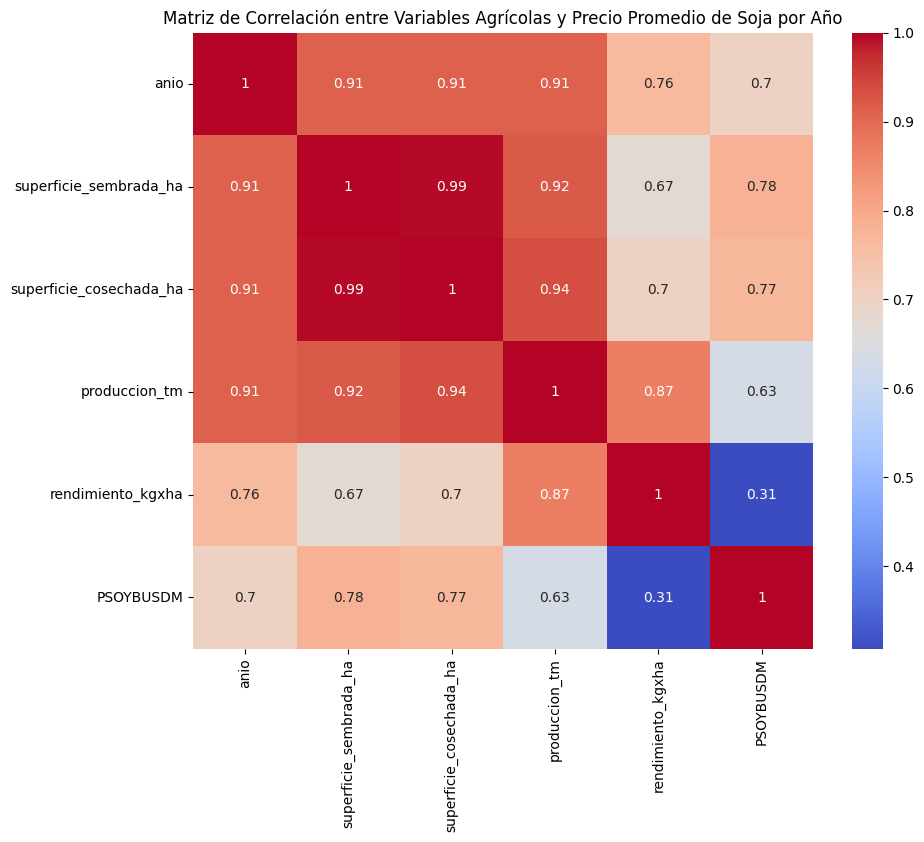

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data_combined.corr(method = 'spearman')

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación entre Variables Agrícolas y Precio Promedio de Soja por Año")
plt.show()

Realizamos este grafico de Matriz de Correlación para poder ver de mejor manera cuánto estan relacionadas dos variables.
Vemos que todas excepto el rendimiento_kgha con el precio de la Soja por tonelada en USD tienen una correlación bastante buena, por lo menos son todas positivas, lo que quiere decir que cuando una de ellas aumenta la otra tambien lo hace en la medida del valor de la correlación.
Esto quiere decir que cuando el valor de covarianza en el par (variable1,variable2) se acerca mas a 1, más van a estar relacionadas entre ellas.

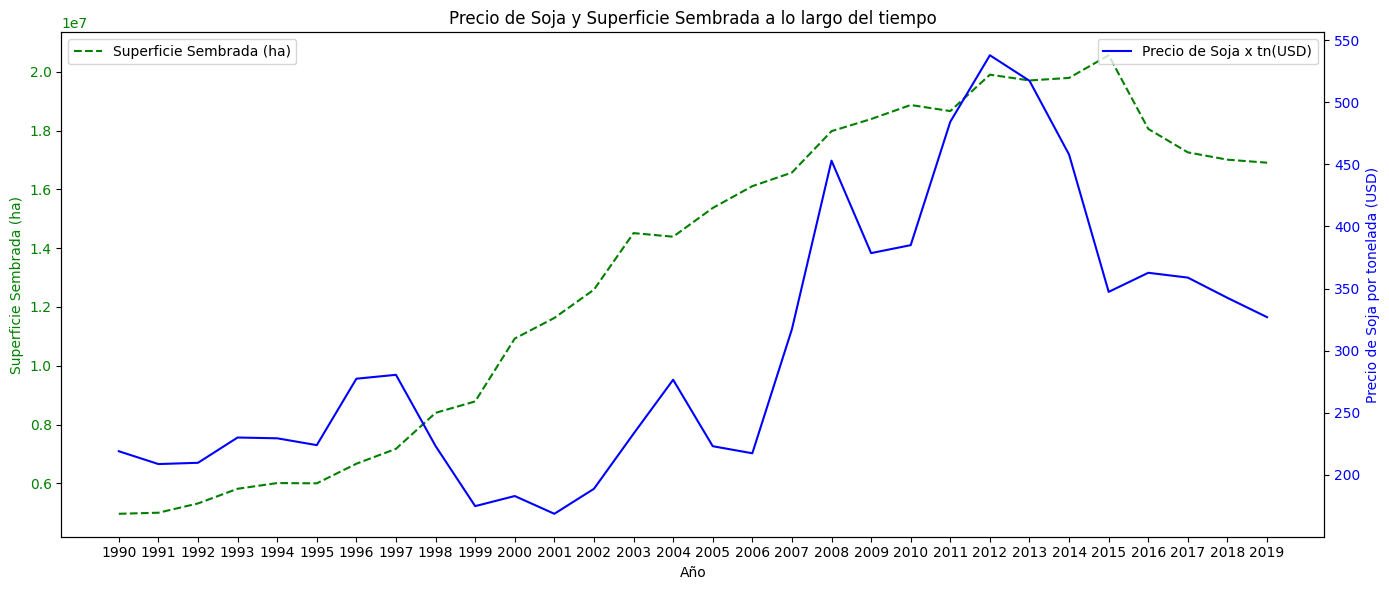

In [ ]:
# Convertir la columna DATE a formato datetime y ordenar por fecha
df_sojita["DATE"] = pd.to_datetime(df_sojita["DATE"])
df_sojita = df_sojita.sort_values("DATE")

# Crear la columna 'anio' en ambos DataFrames para la agrupación y combinación
df_sojita['anio'] = df_sojita['DATE'].dt.year
datos['anio'] = datos['anio'].astype(int)  # Asegurarse de que 'anio' es int en ambos

# Agrupar los datos de superficie sembrada por año
superficie_anual = datos.groupby('anio')['superficie_sembrada_ha'].sum().reset_index()

# Promediar el precio anual de soja
precio_soja_anual = df_sojita.groupby('anio')['PSOYBUSDM'].mean().reset_index()

# Unir los datos de precio y superficie sembrada por año
df_combined = pd.merge(precio_soja_anual, superficie_anual, on='anio', how='inner')

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje primario para superficie sembrada
ax1.plot(df_combined["anio"], df_combined["superficie_sembrada_ha"], linestyle="--", color="green", label="Superficie Sembrada (ha)")
ax1.set_xlabel("Año")
ax1.set_ylabel("Superficie Sembrada (ha)", color="green")
ax1.tick_params(axis='y', labelcolor="green")

# Eje secundario para precio de soja
ax2 = ax1.twinx()
ax2.plot(df_combined["anio"], df_combined["PSOYBUSDM"], linestyle="-", color="blue", label="Precio de Soja x tn(USD)")
ax2.set_ylabel("Precio de Soja por tonelada (USD)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Mostrar todos los años en el eje X
all_years = df_combined["anio"]
plt.xticks(all_years, all_years, rotation=45)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título y ajuste de diseño
plt.title("Precio de Soja y Superficie Sembrada a lo largo del tiempo")
fig.tight_layout()
plt.show()


En esta comparación tenemos el precio de la Soja en el tiempo, donde ya la habíamos descrito anteriormente y al superponer esta variable con la superficie sembrada, vemos dos tendencias crecientes. Aunque podemos notar como diferencia que la sup sembrada es mas constante a lo largo del tiempo y el precio de la soja fluctúa mas por lo anteriormente explicado

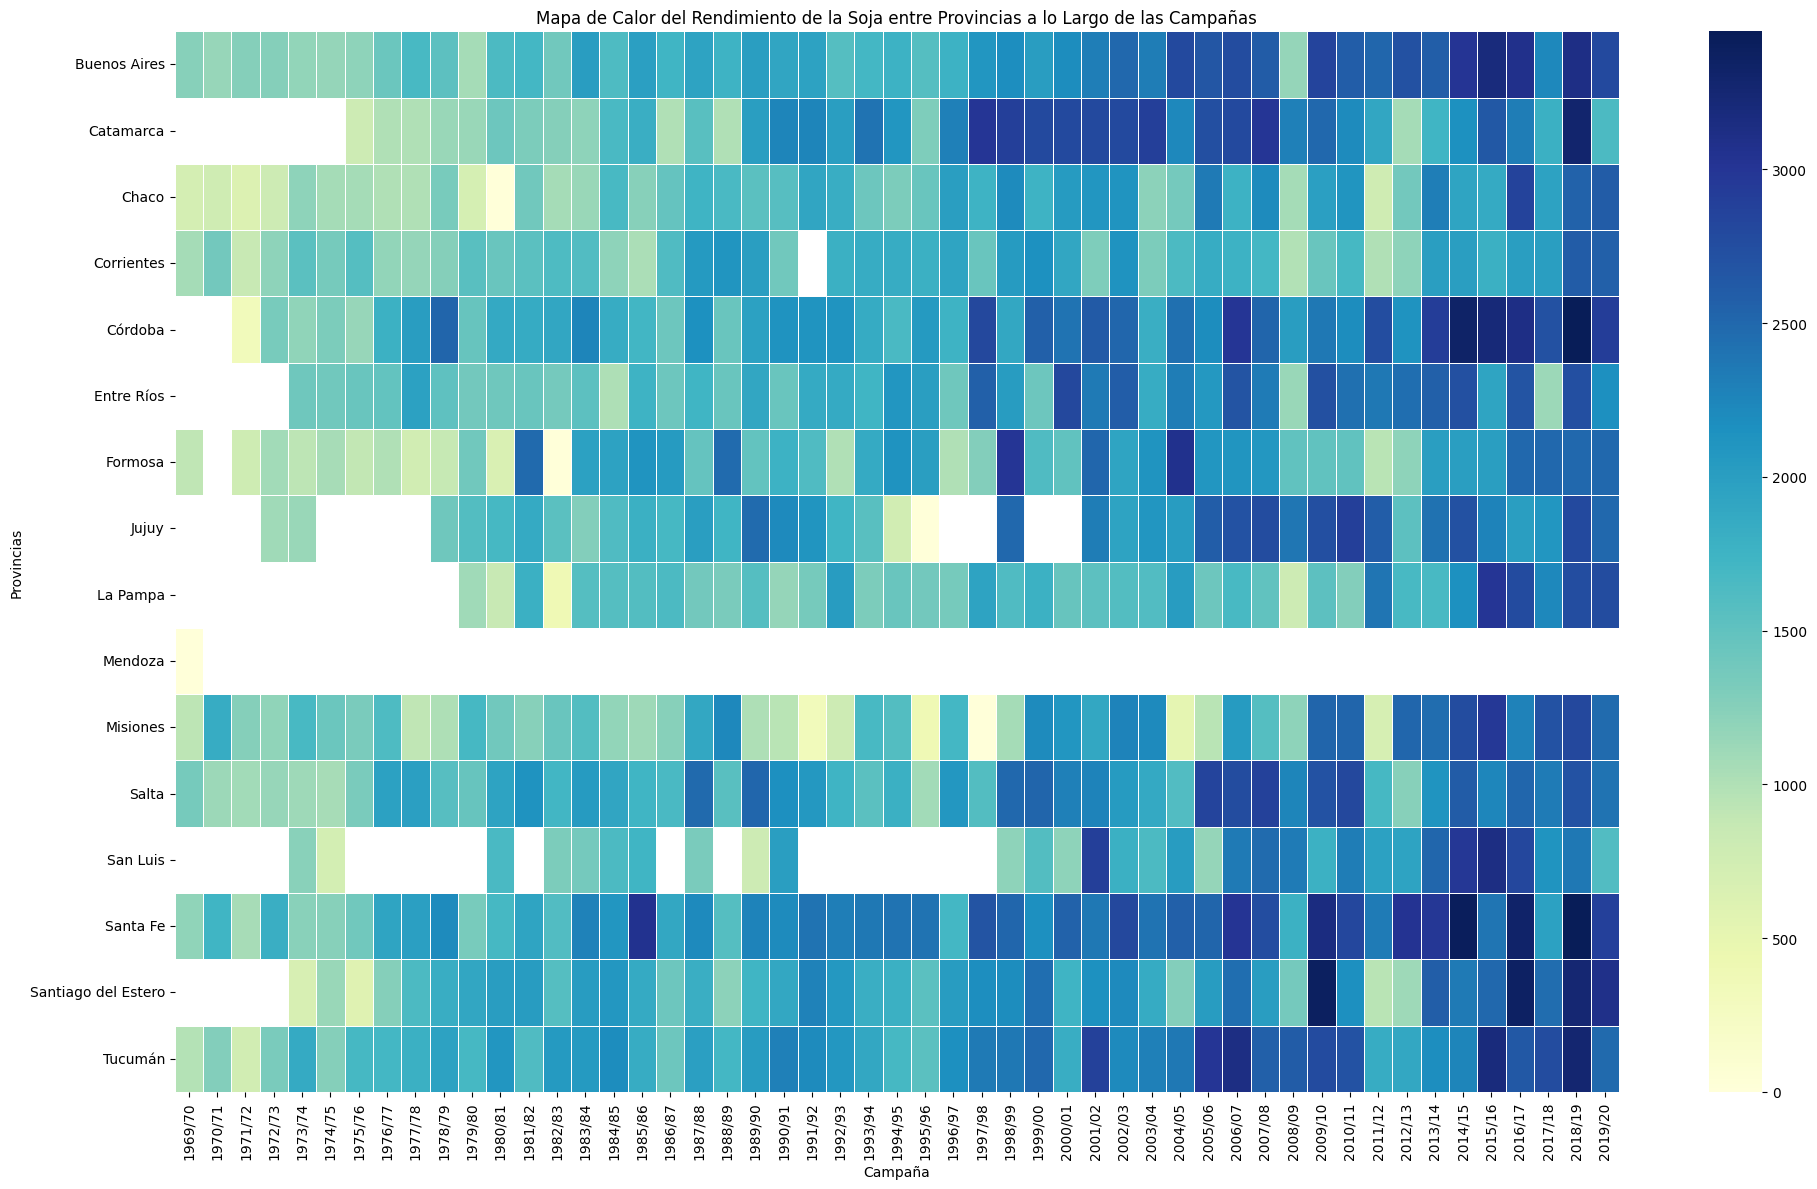

In [ ]:
# Pivotar los datos: cada fila será un departamento y las columnas serán las campañas (anio/campania)
df_pivot = datos.pivot_table(index='provincia_nombre', columns='campania', values='rendimiento_kgxha', aggfunc='mean')

# Crear el mapa de calor
plt.figure(figsize=(20, 12))
sns.heatmap(df_pivot, cmap="YlGnBu", fmt=".1f", linewidths=.5)

# Etiquetas y título
plt.title("Mapa de Calor del Rendimiento de la Soja entre Provincias a lo Largo de las Campañas")
plt.xlabel('Campaña')
plt.ylabel('Provincias')

# Mostrar el mapa
plt.tight_layout()
plt.show()

Como vemos en este mapa de calor, en el eje x tenemos las campañas y en el y las distintas provincias. La tonalidad de los colores mas intensas u oscuras marcan un mayor rendimiento de la soja en determinadas campañas, mientras que en las mas claras esto es menor.

# DEPARTAMENTOS

In [ ]:
ranking_produccion = datos.groupby('departamento_nombre')['produccion_tm'].sum().reset_index()
ranking_produccion = ranking_produccion.sort_values(by='produccion_tm', ascending=False)
ranking_produccion.head(10)

,departamento_nombre,produccion_tm
101,General López,57009946
165,Marcos Juárez,54365079
277,Unión,40762437
241,San Justo,31777342
220,Río Cuarto,29847343
43,Caseros,29361347
128,Iriondo,25642779
266,Tercero Arriba,24842671
61,Constitución,23838898
243,San Martín,23310738


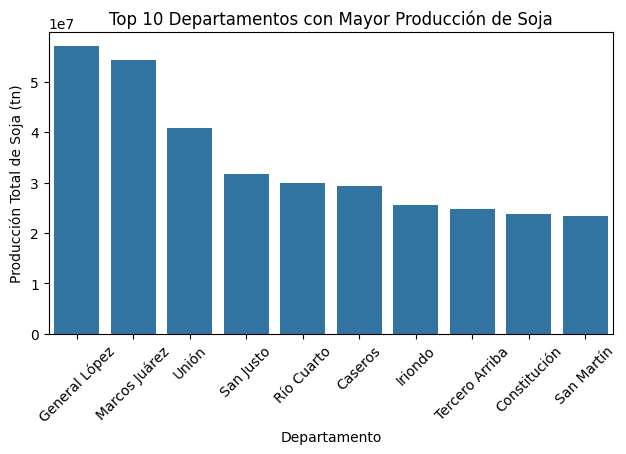

In [ ]:
top_10_produccion = ranking_produccion.head(10)
sns.barplot(x='departamento_nombre', y='produccion_tm', data=top_10_produccion)
plt.title('Top 10 Departamentos con Mayor Producción de Soja')
plt.xlabel('Departamento')
plt.ylabel('Producción Total de Soja (tn)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gracias a este gráfico de barras podemos observar los 10 departamentos que más producieron Soja en todo el país.

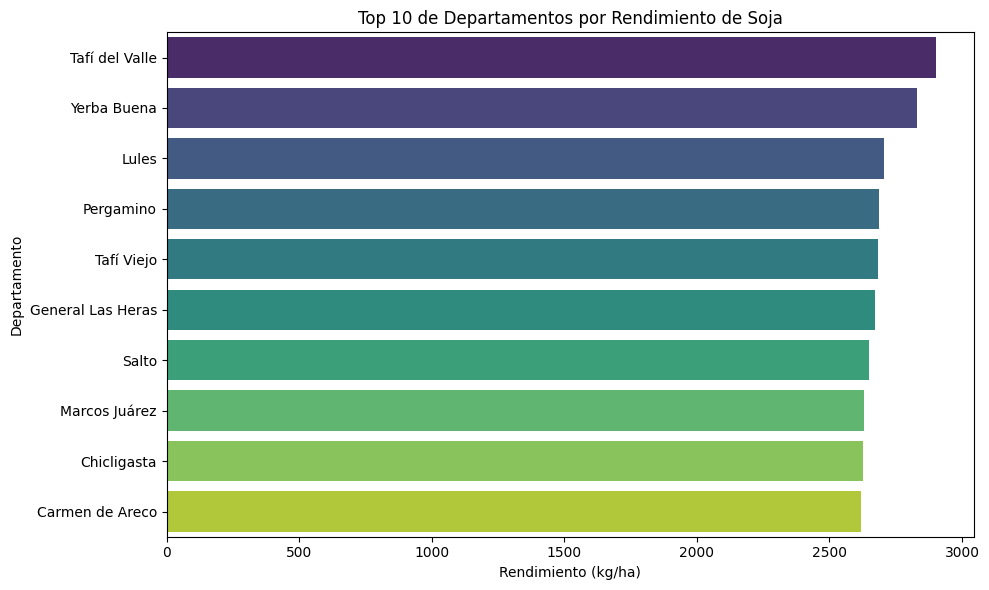

In [ ]:
# Calcular el rendimiento por departamento (kg/ha)
datos['rendimiento'] = datos['produccion_tm'] / datos['superficie_sembrada_ha'] * 1000  # Rendimiento en kg/ha

# Agrupar por departamento y calcular el rendimiento promedio
rendimiento_departamento = datos.groupby('departamento_nombre')['rendimiento'].mean().reset_index()

# Ordenar por rendimiento de mayor a menor
top_rendimiento = rendimiento_departamento.sort_values(by='rendimiento', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rendimiento', y='departamento_nombre', data=top_rendimiento, palette='viridis')
plt.title('Top 10 de Departamentos por Rendimiento de Soja')
plt.xlabel('Rendimiento (kg/ha)')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

En este gráfico de barras observamos que en cuanto a el rendimiento los mejores 10 departamentos son distintos a los que mas produjeron.